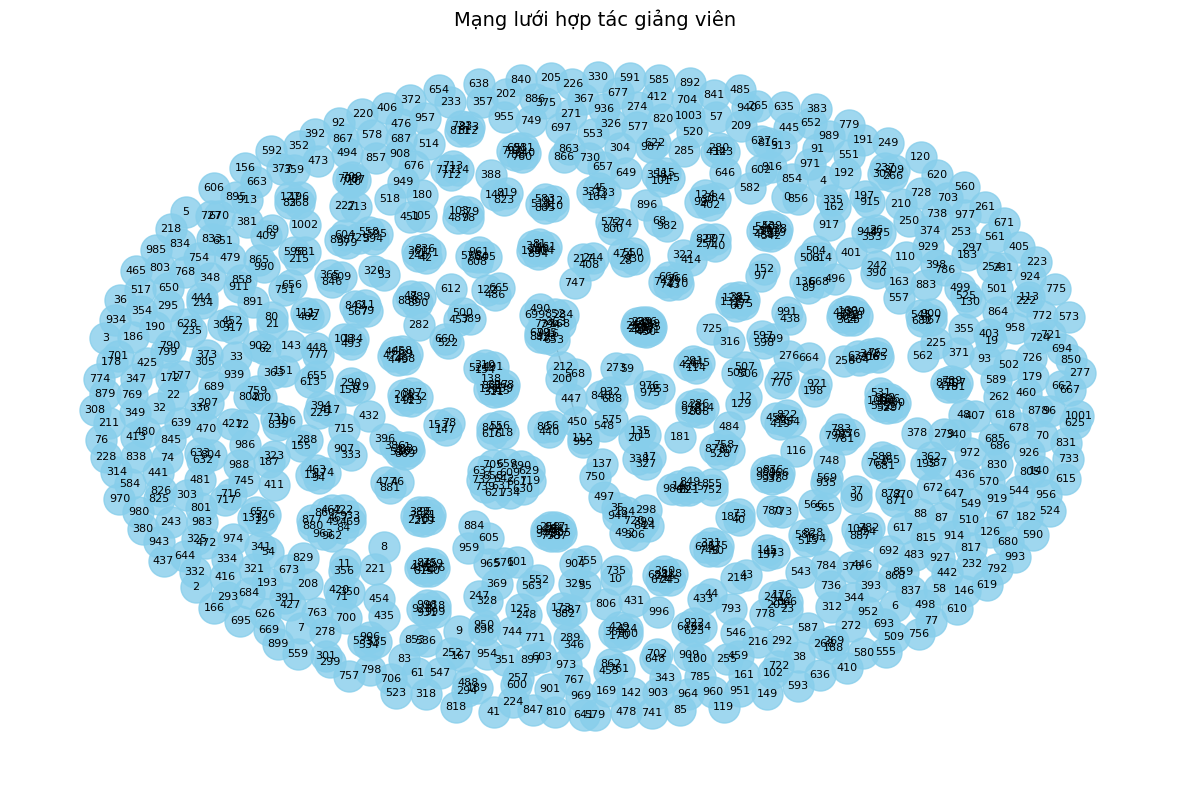

In [5]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# ====== B1: Đọc file ma trận hợp tác ======
df_matrix = pd.read_csv("cooperation_matrix.csv", index_col=0)

# Số instructor
n = df_matrix.shape[0]

# ====== B2: Khởi tạo đồ thị ======
G = nx.Graph()

# Thêm node (theo ID, tên = ID để đơn giản, hoặc bạn có thể load từ instructors.json)
for i in range(n):
    G.add_node(i, name=str(i))

# Thêm cạnh với trọng số
for i in range(n):
    for j in range(i+1, n):
        weight = df_matrix.iloc[i, j]
        if weight > 0:
            G.add_edge(i, j, weight=weight)

# ====== B3: Trực quan hóa mạng ======
plt.figure(figsize=(12, 8))

# Layout
pos = nx.spring_layout(G, k=0.5, seed=42)

# Vẽ node
nx.draw_networkx_nodes(G, pos, node_size=500, node_color="skyblue", alpha=0.8)

# Vẽ cạnh (độ dày theo số lần hợp tác)
weights = [G[u][v]['weight'] for u, v in G.edges()]
nx.draw_networkx_edges(G, pos, width=[w*0.5 for w in weights], alpha=0.6)

# Vẽ nhãn (ở đây dùng ID, nếu muốn tên giảng viên thì load từ instructors.json)
labels = {node: node for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels, font_size=8)

plt.title("Mạng lưới hợp tác giảng viên", fontsize=14)
plt.axis("off")
plt.tight_layout()
plt.show()
